In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import torch
import torch.multiprocessing as mp
import torch.nn as nn
from torch import optim
import copy

import torchvision

In [9]:
files = [f for f in os.listdir("./home/") if f.endswith(".txt")]

In [10]:
files

['lnorms0.txt',
 'lnorms1.txt',
 'lnorms2.txt',
 'lnorms3.txt',
 'lnorms4.txt',
 'lnorms5.txt',
 'lnorms6.txt',
 'lnorms7.txt',
 'loss.txt',
 'norms.txt',
 'trainers.txt']

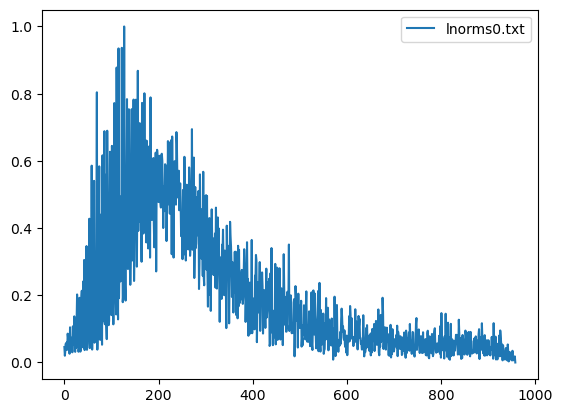

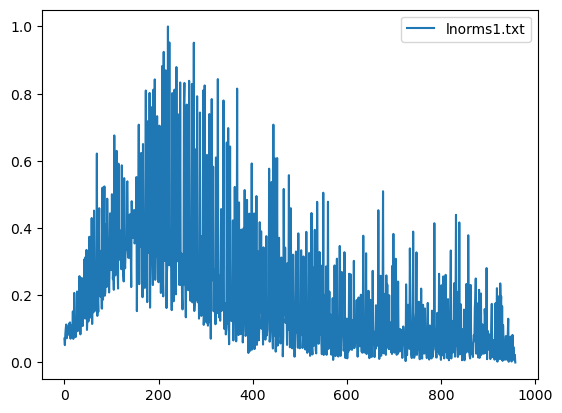

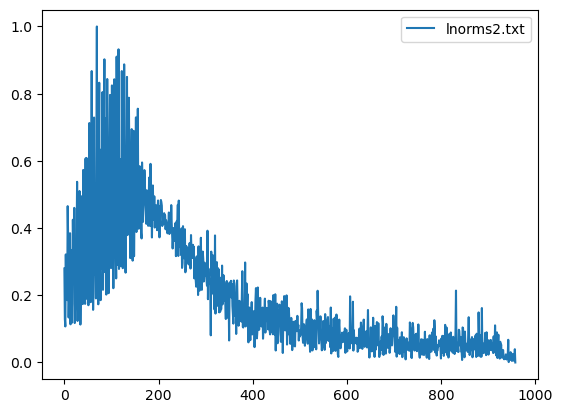

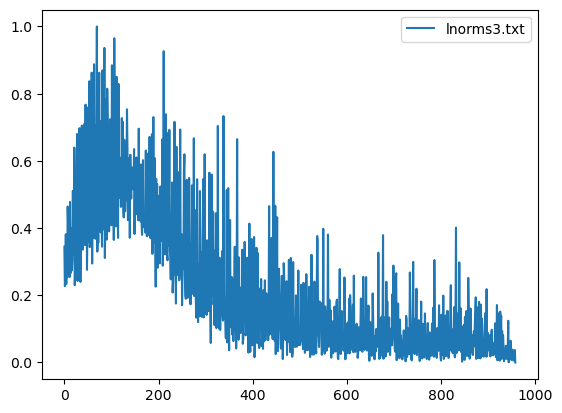

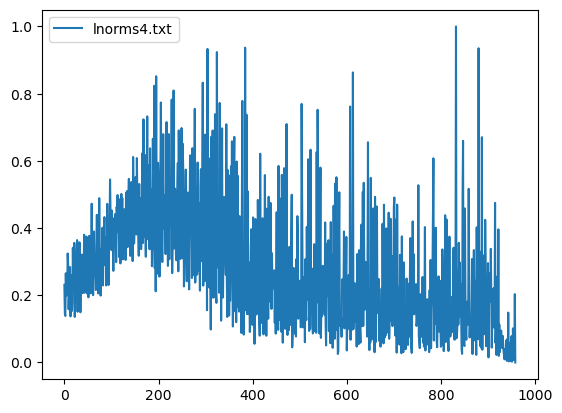

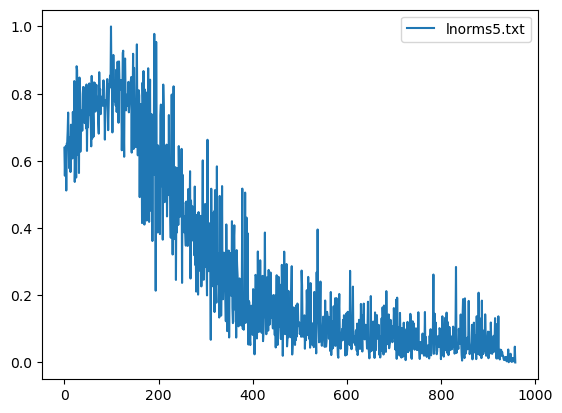

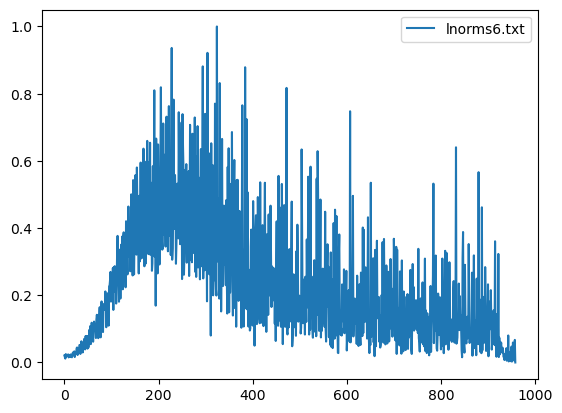

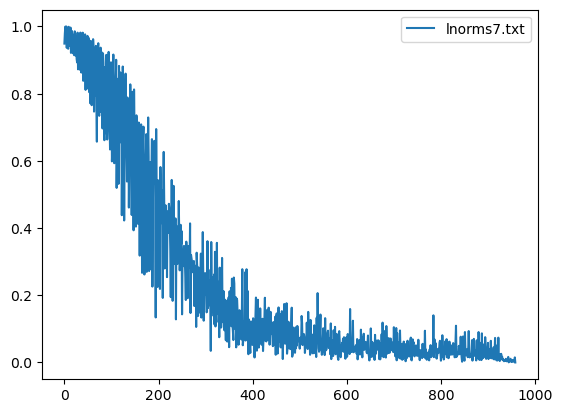

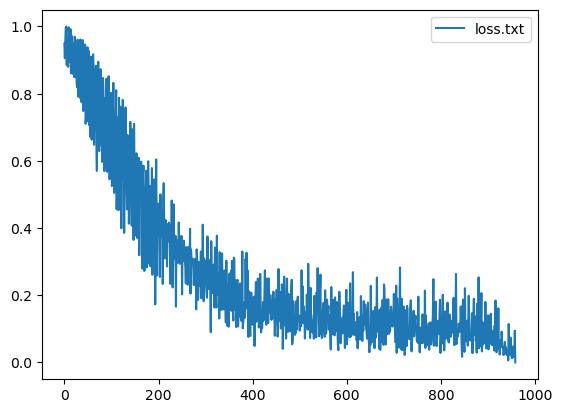

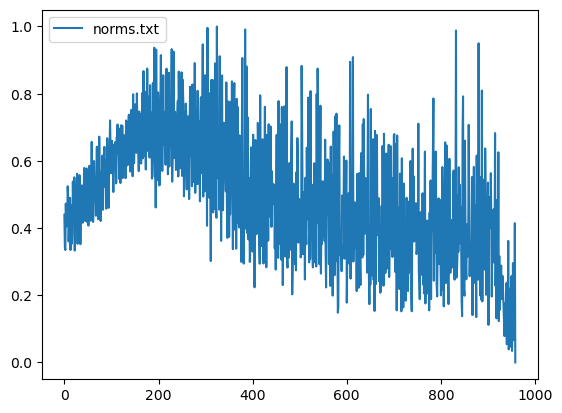

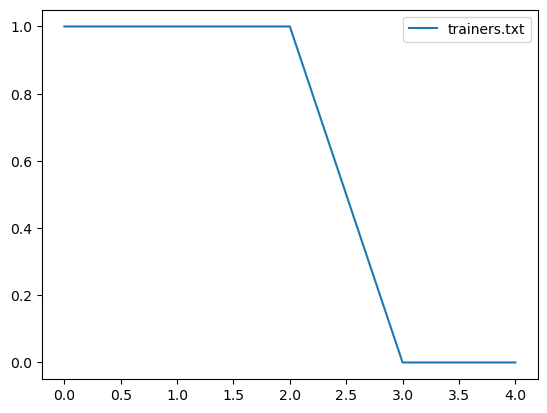

<Figure size 640x480 with 0 Axes>

In [12]:
for f in files:
    arr = np.loadtxt("./home/"+f)
    arr = (arr-min(arr))/(max(arr)-min(arr))
    plt.plot(range(len(arr)), arr, label = f)
    plt.legend()
    plt.figure()

In [16]:
dataset = torchvision.datasets.MNIST('./data/mnist_data', 
                                                    download=True, 
                                                    train=False,
                                                    transform=torchvision.transforms.Compose([
                                                        torchvision.transforms.ToTensor(), # first, convert image to PyTorch tensor
                                                        torchvision.transforms.Normalize((0.1307,), (0.3081,)) # normalize inputs
                                                    ]))

In [18]:
dataset.train_labels

c:\Users\nico9\anaconda3\envs\optml\lib\site-packages\torchvision\datasets\mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([7, 2, 1,  ..., 4, 5, 6])

In [21]:
idx = dataset.train_labels==1
idx

c:\Users\nico9\anaconda3\envs\optml\lib\site-packages\torchvision\datasets\mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([False, False,  True,  ..., False, False, False])

In [23]:
idx = dataset.train_labels==1
dataset1 = dataset.train_labels[idx]
dataset2 = dataset.train_data[idx]

c:\Users\nico9\anaconda3\envs\optml\lib\site-packages\torchvision\datasets\mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
c:\Users\nico9\anaconda3\envs\optml\lib\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [31]:
idx.numpy()

array([False, False,  True, ..., False, False, False])

In [32]:
dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data/mnist_data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [29]:
dataset[idx.numpy()]

ValueError: only one element tensors can be converted to Python scalars

In [35]:
idx = dataset.targets==1
dataset.data = dataset.data[idx]
dataset.targets = dataset.targets[idx]

In [38]:
dataset2 = copy.deepcopy(dataset)

In [51]:
dataset2.root_dir = "./data/"

In [52]:
dataset2

Dataset MNIST
    Number of datapoints: 1135
    Root location: ./data/mnist_data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [53]:
h = iter(torch.utils.data.DataLoader(dataset2, 
                                batch_size=34, 
                                shuffle=True))

In [54]:
next(h)

[tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           ...,
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],
 
 
         [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           ...,
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],
 
 
         [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
       